<a href="https://colab.research.google.com/github/2303a52317/2303A52317/blob/main/Aiml_ass_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [2]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [3]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [7]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [11]:
import pandas as pd
from sklearn.utils import Bunch

# Assuming car_data is your Bunch object

# Convert the Bunch object to a Pandas DataFrame
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)  # Create DataFrame with data and feature names
car_df['target'] = car_data.target  # Add the target variable to the DataFrame

# Now you can use the head() method
car_df.head() # Display the first 5 rows of the DataFrame

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [12]:
type(car_data)

sklearn.utils._bunch.Bunch

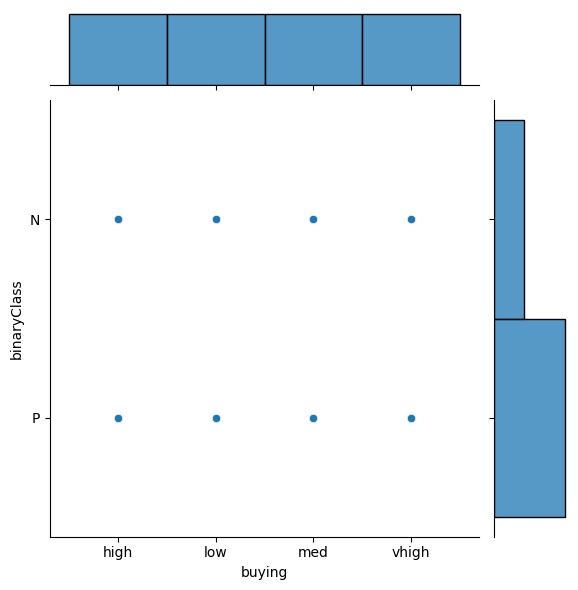

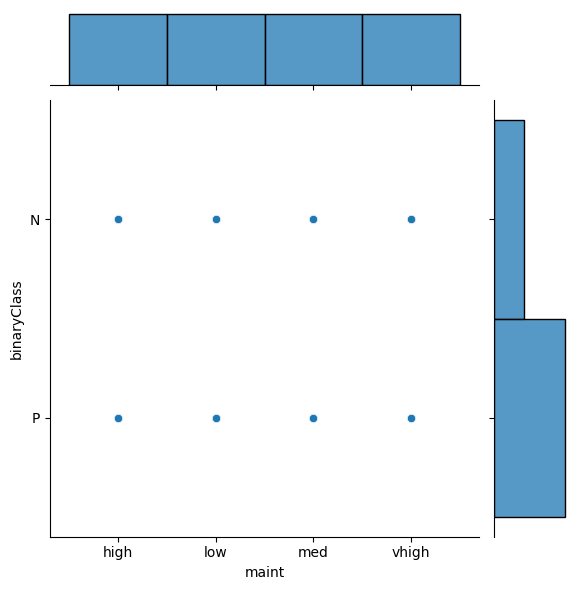

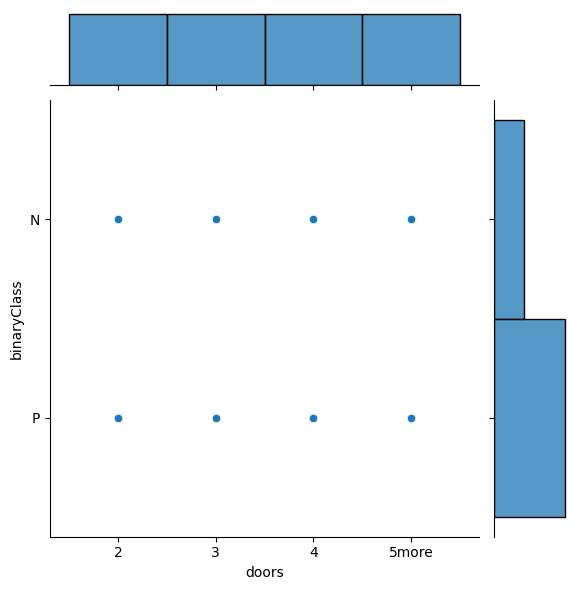

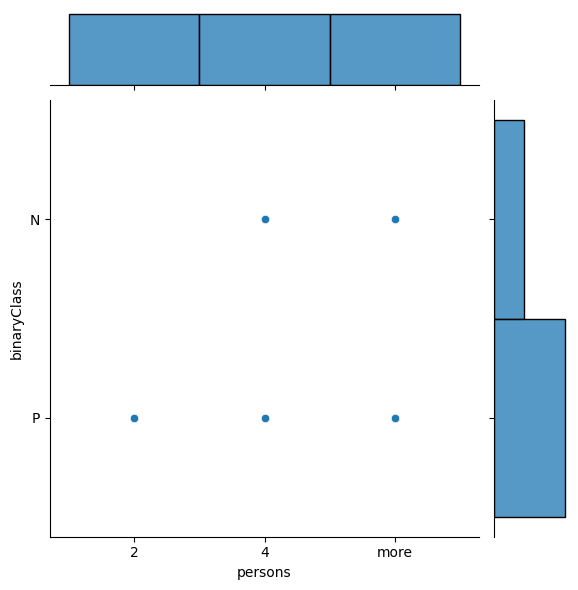

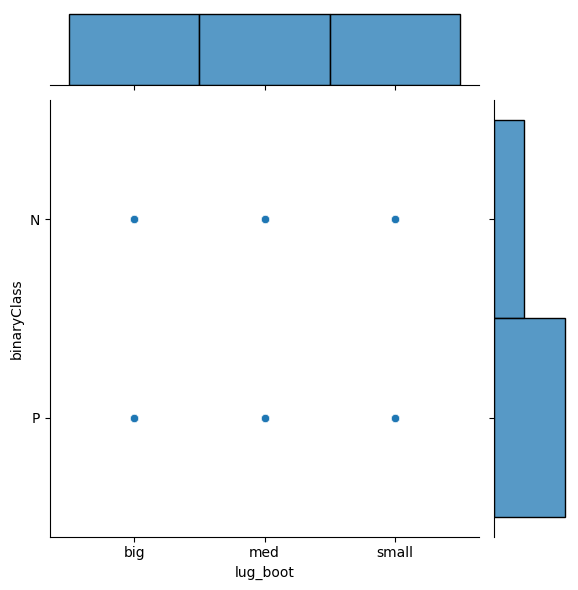

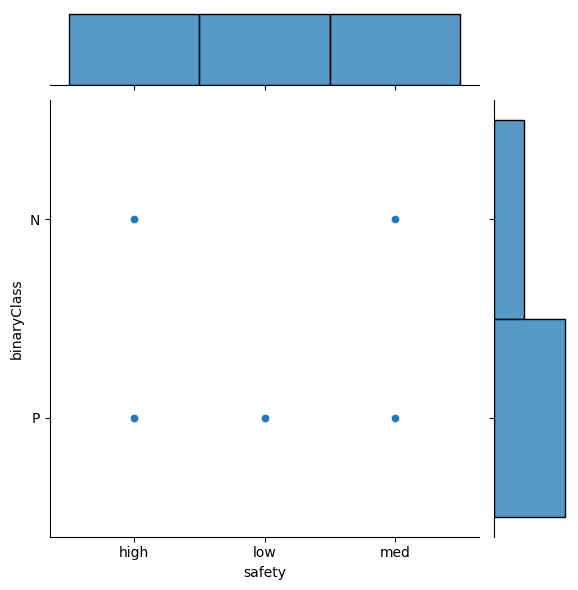

In [13]:
import seaborn as sns
import pandas as pd # Import pandas

# Convert the data to a Pandas DataFrame for easier handling
car_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)
car_df['binaryClass'] = car_data.target  # Add the target variable to the DataFrame

l = len(car_data.feature_names)
for i in range(l):
  sns.jointplot(x=car_data.feature_names[i], y='binaryClass',
                    data=car_df, palette='rainbow')  # Use the DataFrame as data

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Convert car_data.data to DataFrame for train_test_split
car_data_df = pd.DataFrame(car_data.data, columns=car_data.feature_names)
# Include the target variable
car_data_df['target'] = car_data.target

# Now, split the DataFrame
train_data, test_data = train_test_split(car_data_df, test_size=0.2, random_state=220)

# Verify shapes
car_data_df.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [15]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,target
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [16]:
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
target,0


In [17]:
train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [18]:

  train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [19]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [20]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [21]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

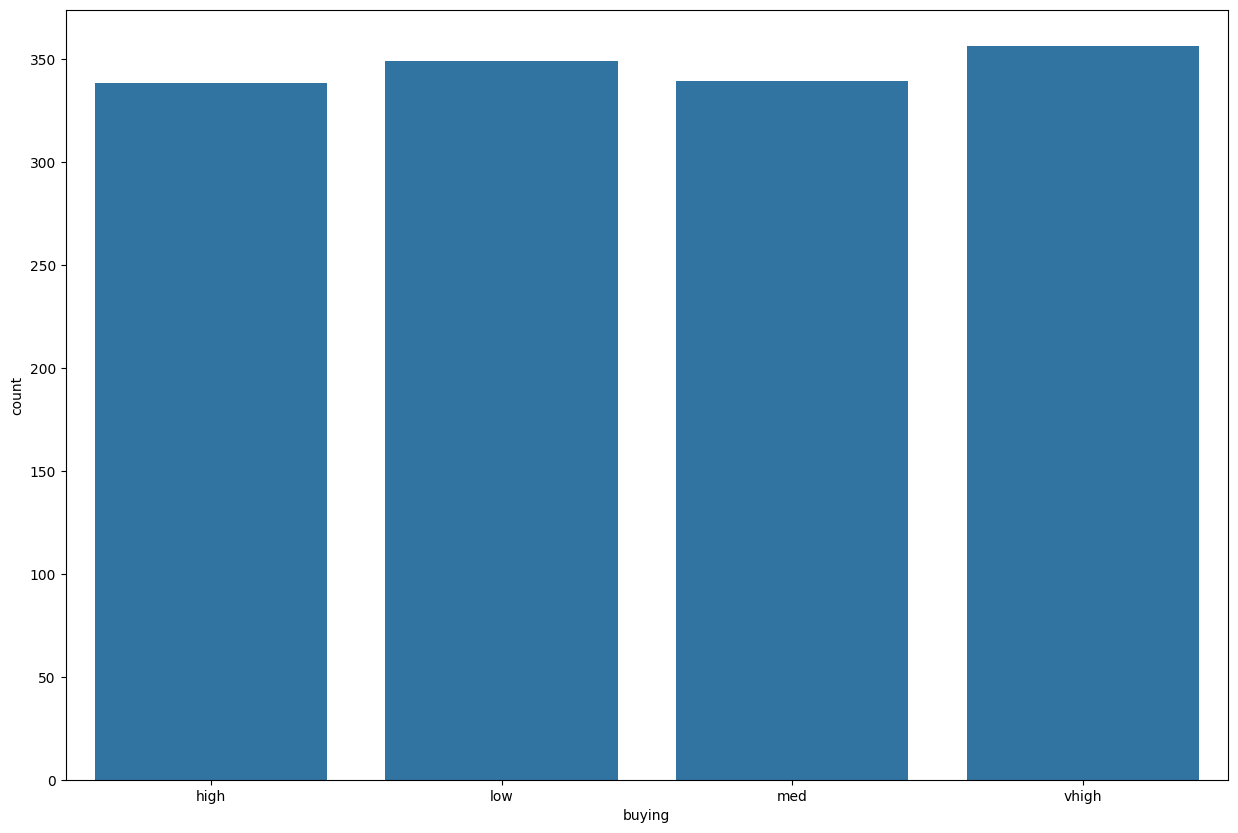

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

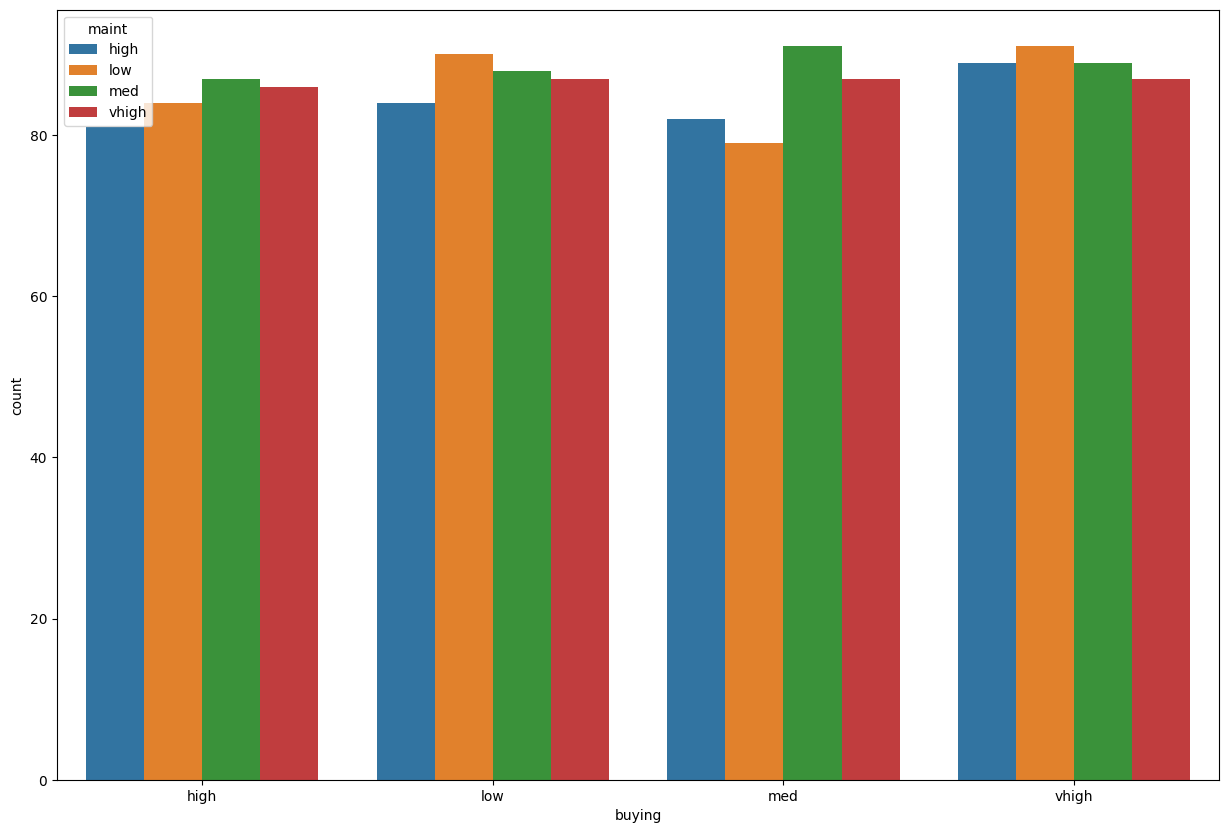

In [23]:
plt.figure(figsize=(15,10))
# Check the actual name of your class column in train_data
# and replace 'class' with the correct name below.
# For example, if the column is named 'Class', change the code to:
# sns.countplot(data=train_data, x='buying', hue='Class')
sns.countplot(data=train_data, x='buying', hue='maint')
plt.show()

In [24]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

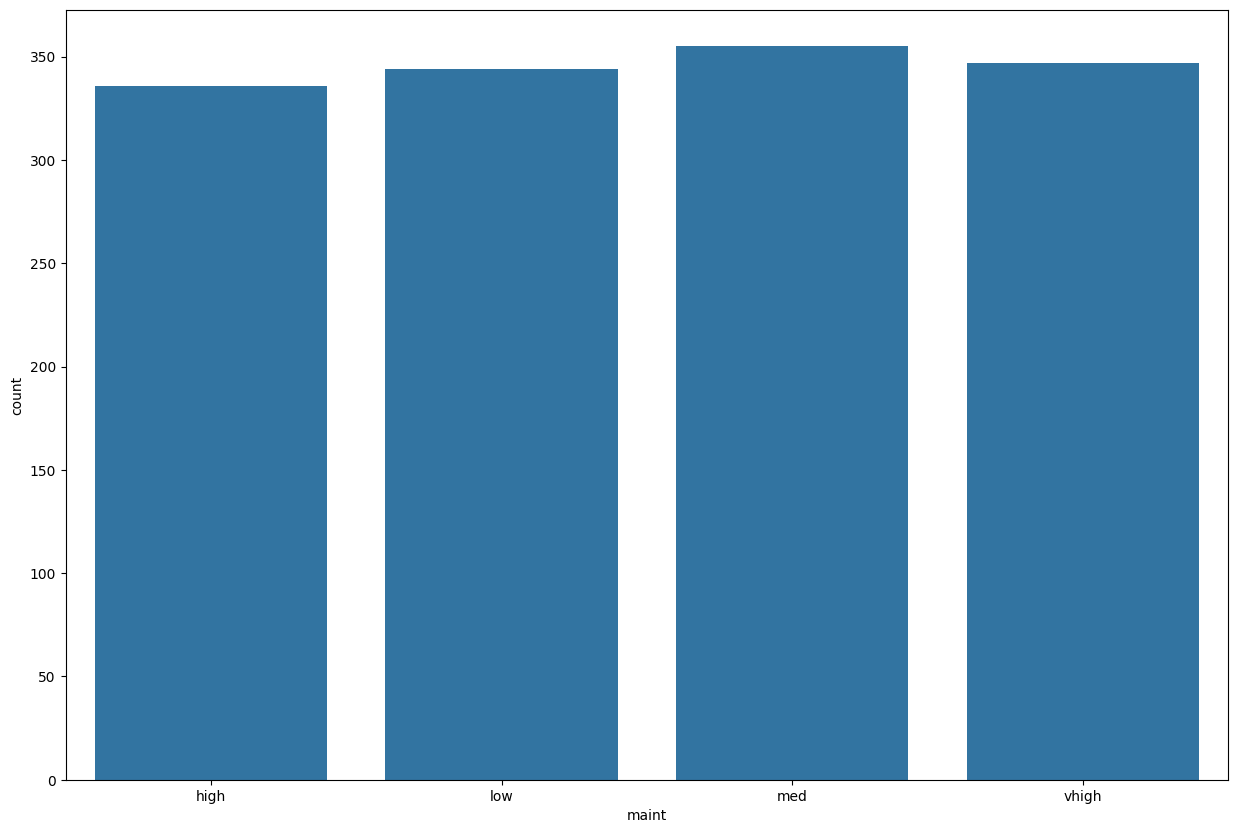

In [25]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

In [27]:
plt.figure(figsize=(15,10))
# Verify the actual name of your class column in train_data
# If it is named differently (e.g., 'Class' or 'Binary_Class'),
# replace 'binaryClass' with the correct name.
# If the column is missing, you need to add it to your DataFrame.
sns.countplot(data=train_data, x='persons', hue='binaryClass')
plt.show()

ValueError: Could not interpret value `binaryClass` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1500x1000 with 0 Axes>

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

ValueError: Could not interpret value `binaryClass` for `hue`. An entry with this name does not appear in `data`.

<Figure size 1500x1000 with 0 Axes>

In [ ]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

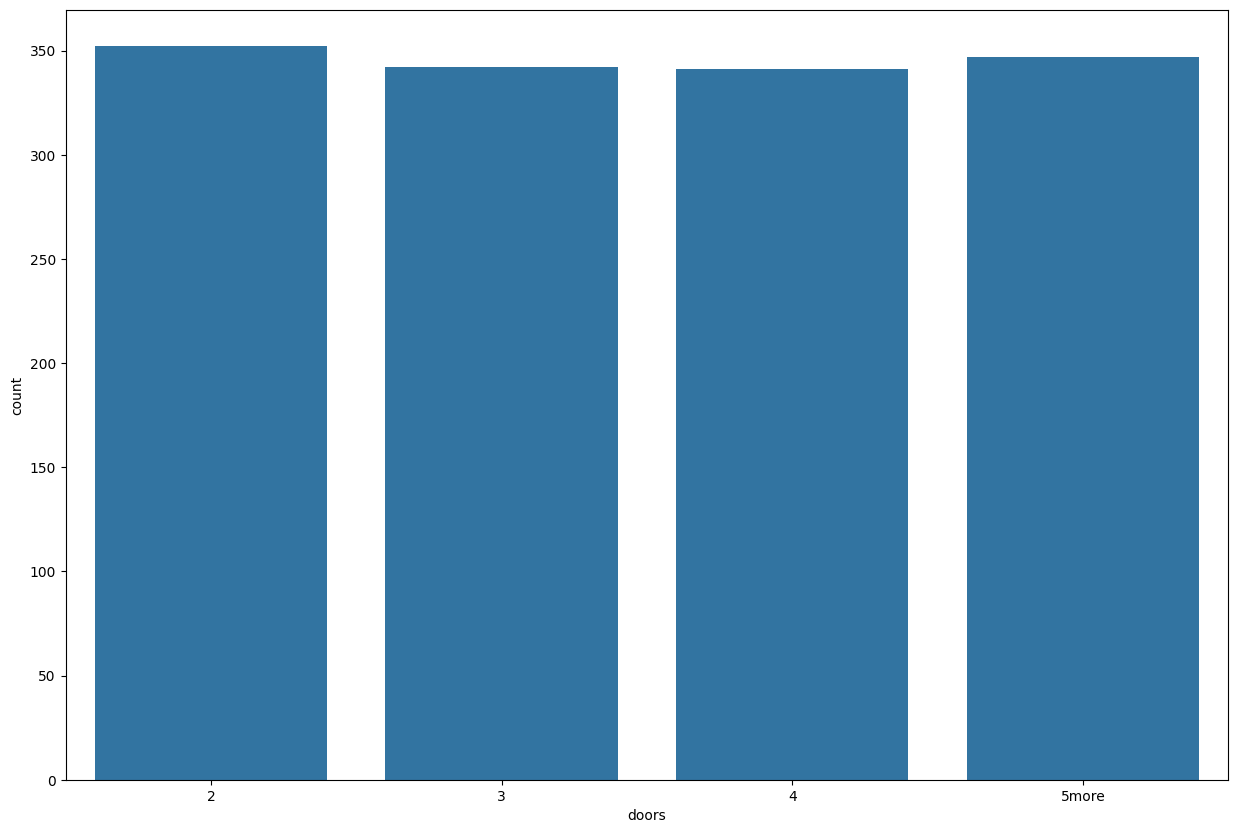

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [ ]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [ ]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
small,478
med,466
big,438


In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [ ]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


In [ ]:

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [ ]:
train_data['binaryClass'].value_counts()

In [28]:

plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

ValueError: Could not interpret value `binaryClass` for `x`. An entry with this name does not appear in `data`.

<Figure size 1500x1000 with 0 Axes>

In [29]:
#data preprocessing
car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

KeyError: "['binaryClass'] not found in axis"

In [ ]:
car_train_prepared.shape, car_labels_prepared.shape

In [ ]:
#5 - Training Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')
tree_clf.fit(car_train_prepared, car_labels_prepared)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,class_names=['N','P']);

In [ ]:
from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix
preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

In [ ]:
accuracy_score(car_labels_prepared,preds)

In [ ]:
tree_clf.get_params()

In [ ]:
# Let's hide warnings returned by grid search
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)
grid_search.fit(car_train_prepared, car_labels_prepared)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
tree_best = grid_search.best_estimator_

In [ ]:
car_data.columns

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [ ]:
from sklearn.metrics import accuracy_score
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
accuracy = accuracy_score(car_labels_prepared, y_pred)  # Compare predictions with actual labels
print(f"Accuracy: {accuracy:.4f}")  # Print the accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
cm = confusion_matrix(car_labels_prepared, y_pred)  # Compute the confusion matrix
print("Confusion Matrix:")
print(cm)  # Print the confusion matrix

In [ ]:
from sklearn.metrics import classification_report
# Assuming `tree_best` is your trained decision tree model
# `car_train_prepared` is your prepared feature set, and `car_labels_prepared` is your target labels
y_pred = tree_best.predict(car_train_prepared)  # Get predictions from the model
report = classification_report(car_labels_prepared, y_pred)  # Generate the classification report
print("Classification Report:")
print(report)  # Print the classification report

In [ ]:
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']
car_test_prepared = pipe.transform(car_test)
car_test_labels_prepared = label_enc.transform(car_test_labels)
y_pred = tree_best.predict(car_test_prepared)  # Make predictions on the test set
accuracy = accuracy_score(car_test_labels_prepared, y_pred)  # Compare predictions to actual labels
print(f"Accuracy: {accuracy:.4f}")

In [ ]:
y_pred = tree_best.predict(car_test_prepared)  # Make predictions using the trained model
cm = confusion_matrix(car_test_labels_prepared, y_pred)  # Compute the confusion matrix
print(cm)  # Display the confusion matriX

In [ ]:
y_pred = tree_best.predict(car_test_prepared)  # Make predictions on the test set
report = classification_report(car_test_labels_prepared, y_pred)  # Generate the classification report
print(report)  # Print the classification report